# Principal Component Analysis (PCA) is a dimension reduction process with multivariate statistical technique,
introduced by Karl Pearson (an English mathematician and biostatistician).
It find inter-relation between variables in the high dimensional.
It provides solution of major problem with high dimensional dataset's visualization to make it easy to understand. 
It provides solution to avoid overfitting in a classifier due to dimensional dataset along with improving the speed of training process.
how PCA provides above solution?
It calculates principal component in descending order by calculating Eigenvalues and Eigenvectors using the covariance matrix of the previous step.
we will see how PCA can help to visualize a high dimension dataset, reduces computation time, and avoid overfitting.

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
#dataset downloaded from below link
#"https://www.kaggle.com/dipayanbiswas/parkinsons-disease-speech-signal-features"

In [33]:
df= pd.read_csv(r"D:/pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
#we have 755 dimentions in this data set
df.shape

(756, 755)

In [5]:
#in class we have two value 0 and 1
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [15]:
#Standardization of the dataset is a must before applying PCA,
#because PCA is quite sensitive to the dataset that has a high variance in its values.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
scaler.fit(df)
X=scaler.transform(df)
X

array([[-1.72519117,  0.96874225,  0.62764391, ..., -0.81472704,
        -0.36659507,  0.58345997],
       [-1.72519117,  0.96874225,  0.12161952, ..., -0.58297219,
         0.40039616,  0.58345997],
       [-1.72519117,  0.96874225,  0.61795018, ..., -0.8043897 ,
        -0.7809355 ,  0.58345997],
       ...,
       [ 1.72519117, -1.03226633,  0.81336154, ..., -0.79017671,
        -0.77287314, -1.71391365],
       [ 1.72519117, -1.03226633,  0.54105055, ..., -0.82631929,
        -0.81173208, -1.71391365],
       [ 1.72519117, -1.03226633,  0.3945807 , ..., -0.84098293,
        -0.82811405, -1.71391365]])

In [19]:
X_Scale = scaler.transform(X)

In [34]:
#applying PCA to the entire dataset and reduce it into two components.
#PCA will convert high dimensional dataset's to low dimention data set.
#and will give data visualizaton based on top 2 component
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class
0,-1.086105e+20,-7.165452e+19,1
1,1.973075e+20,-2.860094e+19,1
2,-1.835117e+19,3.116259e+19,1
3,3.916000e+20,-8.053567e+19,1
4,1.647250e+20,-1.198711e+19,1


Text(0, 0.5, 'pc2')

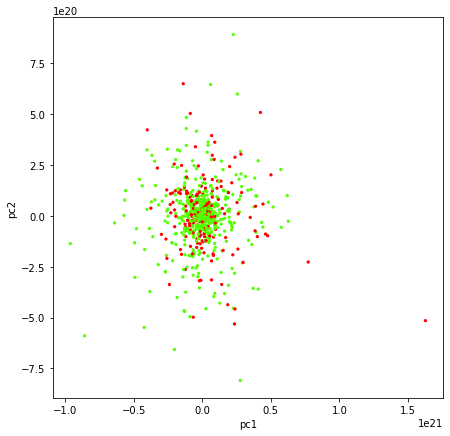

In [35]:
#scatter plot of top 2 component
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf['class'],cmap='prism', s =5)
plt.xlabel('pc1')
plt.ylabel('pc2')

In [36]:
#applying PCA to the entire dataset and reduce it into three components.
#PCA will convert high dimensional dataset's to low dimention data set.
#and will give data visualizaton based on top 3 component
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,class
0,-1.086105e+20,-7.165452e+19,-3.086562e+18,1
1,1.973075e+20,-2.860094e+19,4.586191e+19,1
2,-1.835117e+19,3.116259e+19,6.469442e+18,1
3,3.916000e+20,-8.053567e+19,1.310858e+20,1
4,1.647250e+20,-1.198711e+19,1.443065e+19,1


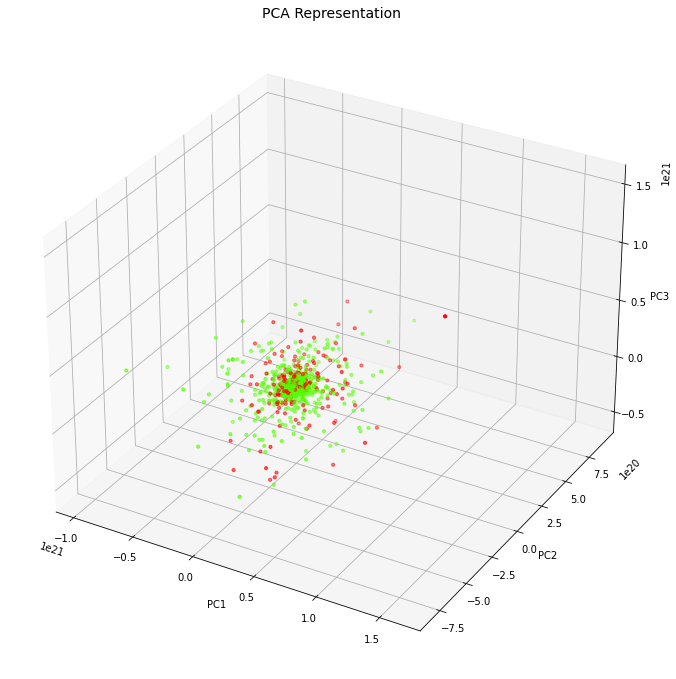

In [37]:
#visualizing the three PCA components with the help of 3-D Scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('PCA Representation', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['class'], cmap = 'prism', s=10)


In [38]:
#Here we are going to separate the dependent label column into y dataframe.
#And all remaining columns into X dataframe.
X = df.drop('class',axis=1).values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

StandardScaler()

In [39]:
# Apply transform to both the training set and the test set.
X_train_pca = scaler.transform(X_train)
X_test_pca = scaler.transform(X_test)
 
##Creating Logistic Regression Model with PCA
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)

LogisticRegression()

In [41]:
%%time
y_train_hat =logisticRegr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset with PCA is: 76.5595 %
Wall time: 2 ms


In [42]:
y_test_hat=logisticRegr.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our Testing dataset with tuning is : {:.3f}%".format(test_accuracy) )

Accuracy for our Testing dataset with tuning is : 77.974%
Wall time: 2 ms


In [ ]:
#Creating Logistic Regression Model without PCA
#Here we create a logistic regression model and can see that the model has terribly overfitted. 
#The training accuracy is 100% and the testing accuracy is 84.5%.

In [43]:
%%time
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_pca,y_train)

y_train_hat =logisticRegr.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset with PCA is: 100.0000 %
Wall time: 47 ms


In [46]:
y_test_hat=logisticRegr.predict(X_test_pca)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our Testing dataset with PCA is : {:.3f}%".format(test_accuracy) )

Accuracy for our Testing dataset with PCA is : 84.141%


In [ ]:
# Conclusion :we learned how PCA helps to visualize a high dimension dataset,
#reduces computation time, and avoid overfitting.